### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()
#np.random.seed(0)

,Unnamed: 0,val,seq,left,right,ori,contig
0,0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG,3695629,3695669,+,MG1655.fa
1,1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG,1109059,1109099,+,MG1655.fa
2,2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG,822216,822256,-,MG1655.fa
3,3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC,772478,772518,+,MG1655.fa
4,4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT,2748531,2748571,+,MG1655.fa


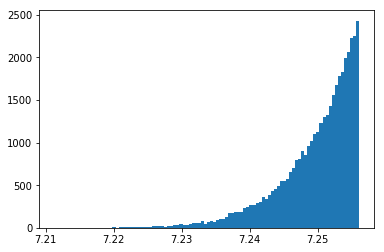

In [3]:
T = 300
t_max = 15
t_bg = 0.01

size_of_data = 40000

input_data_ordered_raw_copy = input_data_ordered_raw[0:size_of_data].copy()

temp = np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T)/(1+np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T))
plt.hist(t_max*temp+t_bg,bins=100)
plt.show()
#np.array(input_data_ordered_raw['val'][0:100000])


### Add transcription column to dataframe

In [4]:
input_data_ordered_raw_copy['t'] = t_max*temp+t_bg

In [5]:
input_data_ordered_raw_copy.head()

,Unnamed: 0,val,seq,left,right,ori,contig,t
0,0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG,3695629,3695669,+,MG1655.fa,7.211304
1,1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG,1109059,1109099,+,MG1655.fa,7.215363
2,2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG,822216,822256,-,MG1655.fa,7.217392
3,3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC,772478,772518,+,MG1655.fa,7.217526
4,4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT,2748531,2748571,+,MG1655.fa,7.218098


### Draw read counts according to poission distribution and add to dataframe

In [6]:
lamba_poission = 0.5
C = np.random.poisson(lamba_poission*input_data_ordered_raw_copy['t'][0:size_of_data])


In [7]:
t_norm = (temp-min(temp))/(max(temp)-min(temp))
input_data_ordered_raw_copy['t_norm'] = t_norm

In [8]:
C_norm = (C-min(C))/(max(C)-min(C))
input_data_ordered_raw_copy['C'] = C_norm

In [9]:
val_norm_temp = input_data_ordered_raw_copy['val']
val_norm = (val_norm_temp-min(val_norm_temp))/(max(val_norm_temp)-min(val_norm_temp))
input_data_ordered_raw_copy['val_norm'] = val_norm

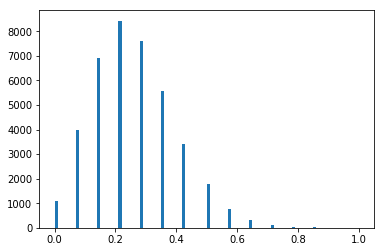

In [10]:
plt.hist(input_data_ordered_raw_copy['C'],bins=100)
plt.show()

In [11]:
input_data_ordered_raw_copy.head(10)

,Unnamed: 0,val,seq,left,right,ori,contig,t,t_norm,C,val_norm
0,0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG,3695629,3695669,+,MG1655.fa,7.211304,0.000000,0.142857,1.000000
1,1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG,1109059,1109099,+,MG1655.fa,7.215363,0.090635,0.357143,0.909347
2,2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG,822216,822256,-,MG1655.fa,7.217392,0.135953,0.071429,0.864020
3,3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC,772478,772518,+,MG1655.fa,7.217526,0.138936,0.142857,0.861038
4,4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT,2748531,2748571,+,MG1655.fa,7.218098,0.151701,0.071429,0.848270
5,5,23.2930,TTCATACACGCCCCCTTGCAGTGCATGCGGCGTCCTGCTGG,2086277,2086317,+,MG1655.fa,7.218984,0.171490,0.071429,0.828478
6,6,23.2838,CCACAGCATGGGCCACGTTCACGGCTTCAGCGGTGGACATA,2203474,2203514,-,MG1655.fa,7.219099,0.174054,0.000000,0.825914
7,7,23.2608,GATATGCATGCGCTACTCGCAACAGTACAGGCGTCGTCCCC,2697275,2697315,+,MG1655.fa,7.219386,0.180465,0.285714,0.819502
8,8,23.2593,AACCTGCACGCGCCATCTTAATGGCTTCAGTCAGCGCCTCA,923886,923926,-,MG1655.fa,7.219404,0.180883,0.428571,0.819084
9,9,23.2508,ATTAAACACGCCGCGCAGCACCCCGGCCAGCGTTCCCATCA,2674457,2674497,+,MG1655.fa,7.219510,0.183252,0.357143,0.816715


## Split the data into test and train

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['t_norm'],test_size=0.2,random_state=4)
#x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['C'],test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(input_data_ordered_raw_copy['seq'],input_data_ordered_raw_copy['val_norm'],test_size=0.2)

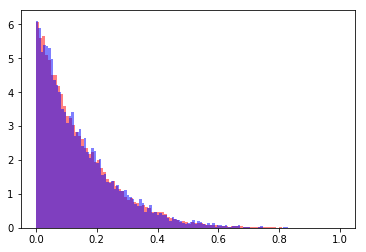

In [14]:
plt.hist(y_train,bins=100,color='r',density=True,alpha=0.5)
plt.hist(y_test,bins=100,color='b',density=True,alpha=0.5)
plt.show()

## One-hot encode the data ... this takes a few minutes

In [15]:
temp_x_train = []
temp_x_test = []

for reshape_index in range(len(x_train)):
    temp_x_train.append(list(np.array(x_train)[reshape_index]))

for reshape_test_index in range(len(x_test)):
    temp_x_test.append(list(np.array(x_test)[reshape_test_index]))
    
x_train = temp_x_train
x_test = temp_x_test

x_train = np.array(x_train)
x_test = np.array(x_test)

In [16]:
x_train_tensor = np.zeros(list(x_train.shape) + [4])    # shape: (batch_size, 4)
x_test_tensor = np.zeros(list(x_test.shape) + [4])    # shape: (batch_size, 4)
base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
num_sample = len(x_train_tensor)
seq_length = len(x_train[0])
test_size = len(x_test)


#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        x_train_tensor[row,col,base_dict[x_train[row,col]]] = 1
        if(row<test_size):
            x_test_tensor[row,col,base_dict[x_test[row,col]]] = 1

In [17]:
print('Training set shape: {}'.format(x_train_tensor.shape))
print('Training set label shape: {}'.format(y_train.shape))

print('Test set shape: {}'.format(x_test_tensor.shape))
print('Test set label shape: {}'.format(y_test.shape))

Training set shape: (32000, 41, 4)
Training set label shape: (32000,)
Test set shape: (8000, 41, 4)
Test set label shape: (8000,)


In [18]:
'''
x_train_flat = []
x_test_flat = []

for flatten_x_train_index in range(len(x_train_tensor)):
    x_train_flat.append(x_train_tensor[flatten_x_train_index].flatten())
    
for flatten_x_test_index in range(len(x_test_tensor)):
    x_test_flat.append(x_test_tensor[flatten_x_test_index].flatten())  

#np.shape(np.array(x_train_flat[0]).reshape(164,1))
x_train_flat = (np.array(x_train_flat).reshape(x_train_tensor.shape[0],x_train_tensor.shape[1]*x_train_tensor.shape[2],1))
x_test_flat = (np.array(x_test_flat).reshape(x_test_tensor.shape[0],x_test_tensor.shape[1]*x_test_tensor.shape[2],1))
'''    

'\nx_train_flat = []\nx_test_flat = []\n\nfor flatten_x_train_index in range(len(x_train_tensor)):\n    x_train_flat.append(x_train_tensor[flatten_x_train_index].flatten())\n    \nfor flatten_x_test_index in range(len(x_test_tensor)):\n    x_test_flat.append(x_test_tensor[flatten_x_test_index].flatten())  \n\n#np.shape(np.array(x_train_flat[0]).reshape(164,1))\nx_train_flat = (np.array(x_train_flat).reshape(x_train_tensor.shape[0],x_train_tensor.shape[1]*x_train_tensor.shape[2],1))\nx_test_flat = (np.array(x_test_flat).reshape(x_test_tensor.shape[0],x_test_tensor.shape[1]*x_test_tensor.shape[2],1))\n'

In [19]:
y_train.shape

(32000,)

In [20]:
y_train = np.array(y_train).reshape(y_train.shape[0],1)

## Custom error metric

In [21]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Custom Loss

In [22]:
import keras.backend as K

def customLoss(yTrue,yPred):
    # Log-likelihood = sum_i=1 to (batch_size) [-Lambda + C_i log (Lambda) - Log(C_i!)]
    # lambda is Lambda*t(x_i)
    return K.sum(K.log(yTrue) - K.log(yPred))

Using TensorFlow backend.


In [23]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout 
from keras import regularizers
from keras.optimizers import SGD, Adam
#output_dim = nb_classes = 15 
#input_dim = seq_length
model = Sequential() 
model.add(Flatten())
model.add(Dense(100, activation='relu',input_shape=(41,4)))
model.add(Dropout(0.25))
model.add(Dense(41, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

#batch_size = 10000 
#nb_epoch = 20

In [ ]:
#model.compile(loss='mean_absolute_error',optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error',r_square])
#model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])

In [ ]:
#history = model.fit(x_train_flat, y_train, validation_split=0.2, epochs=25)  # starts training
history = model.fit(x_train_tensor, y_train, validation_split=0.2, epochs=75)  # starts training

Train on 25600 samples, validate on 6400 samples
Epoch 1/75
25600/25600 [==============================] - 1s 51us/step - loss: 0.0535 - mean_absolute_error: 0.1736 - r_square: -2.8069 - val_loss: 0.0200 - val_mean_absolute_error: 0.1003 - val_r_square: -0.3240
Epoch 2/75
25600/25600 [==============================] - 1s 35us/step - loss: 0.0220 - mean_absolute_error: 0.1118 - r_square: -0.4868 - val_loss: 0.0169 - val_mean_absolute_error: 0.0929 - val_r_square: -0.1016
Epoch 3/75
25600/25600 [==============================] - 1s 35us/step - loss: 0.0181 - mean_absolute_error: 0.1022 - r_square: -0.2008 - val_loss: 0.0158 - val_mean_absolute_error: 0.0932 - val_r_square: -0.0369
Epoch 4/75
25600/25600 [==============================] - 1s 35us/step - loss: 0.0167 - mean_absolute_error: 0.0986 - r_square: -0.0974 - val_loss: 0.0155 - val_mean_absolute_error: 0.0934 - val_r_square: -0.0222
Epoch 5/75
25600/25600 [==============================] - 1s 35us/step - loss: 0.0162 - mean_absolu

25600/25600 [==============================] - 1s 44us/step - loss: 9.7021e-04 - mean_absolute_error: 0.0215 - r_square: 0.9334 - val_loss: 3.8128e-04 - val_mean_absolute_error: 0.0123 - val_r_square: 0.9733
Epoch 40/75
25600/25600 [==============================] - 1s 43us/step - loss: 9.4341e-04 - mean_absolute_error: 0.0210 - r_square: 0.9356 - val_loss: 3.8099e-04 - val_mean_absolute_error: 0.0122 - val_r_square: 0.9736
Epoch 41/75
25600/25600 [==============================] - 1s 41us/step - loss: 8.7019e-04 - mean_absolute_error: 0.0203 - r_square: 0.9409 - val_loss: 3.8855e-04 - val_mean_absolute_error: 0.0124 - val_r_square: 0.9729
Epoch 42/75
25600/25600 [==============================] - 1s 41us/step - loss: 8.5833e-04 - mean_absolute_error: 0.0199 - r_square: 0.9426 - val_loss: 3.5471e-04 - val_mean_absolute_error: 0.0121 - val_r_square: 0.9752
Epoch 43/75
25600/25600 [==============================] - 1s 55us/step - loss: 8.2690e-04 - mean_absolute_error: 0.0195 - r_square:

In [ ]:
plt.figure()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history['mean_absolute_error'],color='blue')
plt.plot(history.history['val_mean_absolute_error'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [ ]:

plt.figure()
plt.plot(history.history['r_square'],color='blue')
plt.plot(history.history['val_r_square'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()


In [ ]:
#model_prediction = model.predict(x_test_flat)
model_prediction = model.predict(x_test_tensor)

In [ ]:
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
plt.hist(model_prediction,color='r',density=True,bins=20)
plt.hist(y_test,color='b',alpha=0.5,density=True,bins=20)
#plt.hist(model_prediction,bins=100,color='b',alpha=0.5)
plt.show()

In [ ]:
plt.scatter(y_test,model_prediction,alpha=0.5)
plt.xlabel('Test Label')
plt.ylabel('NN Prediction')
plt.plot([0,1],color='black',linewidth=2,alpha=0.25)
plt.show()

In [ ]:
model.summary()

In [ ]:
np.shape(model.layers[5].get_weights()[0])

In [ ]:
import seaborn as sns
sns.heatmap(model.layers[3].get_weights()[0][0].reshape(1,41))
plt.show()